# **pandas**


---


## **파이썬에서 사용하는 데이터분석 라이브러리**
 + 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구
 + NumPy를 기반으로 구축되었으며 과학 컴퓨팅 환경 내에서 다른 많은 타사 라이브러리와 잘 통합되도록 설계 
 + 많은 기능을 가진 데이터 구조
   - 다양한 방식으로 색인된 데이터를 다룰 수 있는 기능
   - 시계열 데이터와 비시계열 데이터를 함께 다룰 수 있는 통합 자료 구조
   - 누락된 데이터를 유연하게 처리할 수 있는 기능
   - SQL 같은 일반 데이터베이스처럼 데이터를 합치고 관계연산을 수행하는 기능

### **pandas 자료 구조**
* **Series**
 + 1차원 자료구조
 + index로 value를 구분하는 1차원 자료구조

* **DataFrame**
 + 2차원 자료구조
 + DataFrame는 행과 열이 있는 테이블 데이터



---

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **판다스(Pandas)를 이용한 뉴스분석**


---


🏷️ **외부 데이터 가져오기**


---
+ csv 읽기
 - 한글 파일명을 사용할 경우 : df = pd.read_csv(‘파일명‘, engine='python')
 - 파일 내용 한글이 깨지는 경우 : df = pd.read_csv(‘파일명‘, engine='python', encoding='cp949')
>
```
df = pd.read_csv(‘파일명‘)
```

+ 엑셀 읽기
 - 한글 파일명을 사용할 경우 : df = pd.read_excel(‘파일명‘)
>
```
df = pd.read_excel(‘파일명‘)
```

# 1) 외부 데이터 가져오기


In [4]:
#news.csv 데이터 가져오기
df = pd.read_csv('/content/drive/MyDrive/2022_기초컴퓨터프로그래밍/기말고사/mymbc.csv')

🏷️ **데이터프레임의 정보**


---
**df.info()**
 - 데이터프레임에 대한 전반적인 정보
 - 데이터프레임을 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력

**df.describe()**
  - 컬럼별로 데이터의 개수(count), 데이터의 평균값(mean), 표준 편차(std), 최솟값(min), 4분위수(25%, 50%, 75%), 그리고 최댓값(max)들의 정보 확인




In [5]:
#int64 : 숫자 / object : 문자열
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      20 non-null     int64 
 1   기사제목    20 non-null     object
 2   댓글수     20 non-null     int64 
 3   구분      20 non-null     object
dtypes: int64(2), object(2)
memory usage: 768.0+ bytes


🏷️ **데이터프레임의 인덱스**

--- 
 + 열의 인덱스 : **df.columns**
 + 행의 인덱스 : **df.index**
 + **데이터프레임의 인덱스 변경**
   - 열인덱스 명 변경 : df.column = [열명인덱스]
   - 열항목 중 하나를 인덱스로 사용 : df.set_index(열명)
   - 인덱스를 일반 데이터 열로 전환 : df.reset_index() 

In [6]:
df

,순위,기사제목,댓글수,구분
0,1,이재명 접전 여론조사에 현장 반응은 많이 달라,285,기사
1,2,울먹인 박지현‥민주당에게 마지막 기회를 달라,262,기사
2,3,일본인 55% 한일관계 개선 기대‥최근 조사보다 긍정 답변 높아,176,기사
3,4,권성동 정호영 자진사퇴 늦었다고 생각하지 않는다,146,기사
4,5,중국 내정 간섭 마라 반발‥한국은 분리 대응,120,동영상 뉴스
5,6,경유값 2천 원 육박‥화물차 무기한 총파업 예고,86,동영상 뉴스
6,7,10대 폭주족 경찰차에 부딪혀 중상‥과잉 단속 공방,85,동영상 뉴스
7,8,법무부 인사검증 담당 조직 신설 입법예고,76,기사
8,9,북한 망하게 할 생각 없다‥전술핵 배치는 배제,67,동영상 뉴스
9,10,정호영 자진 사퇴‥1기 내각 두 번째 낙마,65,동영상 뉴스


In [ ]:
#loc [행 인덱스 , 열 '이름(값)']
df.loc[5,'구분']

'동영상 뉴스'

In [ ]:
#iloc [행 인덱스, 열 인덱스]
df.iloc[5,3]

'동영상 뉴스'

🏷️ **데이터프레임 요소 가져오기**


---

**df.loc[행인덱스, 열인덱스]**
+ 특정 열 가져오기 : df.loc[:, 열인덱스]
+ 특정 행 가져오기 : df.loc[행인덱스, :]
+ 특정 항목 가져오기 : df.loc[행인덱스, 열인덱스]

In [ ]:
df.index

RangeIndex(start=0, stop=20, step=1)

In [ ]:
df.columns

Index(['순위', '기사제목', '댓글수', '구분'], dtype='object')

In [ ]:
#n번째 행 전체 가져오기
df.loc[[10],:]

,순위,기사제목,댓글수,구분
10,11,서울 성동구 아파트 화단서 40대 엄마·장애 아들 숨진 채 발견,61,기사


In [ ]:
# 열 가져오기 -> 시리즈
df.loc[:,'구분'] #df['구분'] 

0         기사
1         기사
2         기사
3         기사
4     동영상 뉴스
5     동영상 뉴스
6     동영상 뉴스
7         기사
8     동영상 뉴스
9     동영상 뉴스
10        기사
11        기사
12    동영상 뉴스
13        기사
14    동영상 뉴스
15    동영상 뉴스
16    동영상 뉴스
17        기사
18    동영상 뉴스
19    동영상 뉴스
Name: 구분, dtype: object

In [ ]:
#df[ ['구분'] ] -> 데이터프레임
df[['기사제목','구분']]

,기사제목,구분
0,이재명 접전 여론조사에 현장 반응은 많이 달라,기사
1,울먹인 박지현‥민주당에게 마지막 기회를 달라,기사
2,일본인 55% 한일관계 개선 기대‥최근 조사보다 긍정 답변 높아,기사
3,권성동 정호영 자진사퇴 늦었다고 생각하지 않는다,기사
4,중국 내정 간섭 마라 반발‥한국은 분리 대응,동영상 뉴스
5,경유값 2천 원 육박‥화물차 무기한 총파업 예고,동영상 뉴스
6,10대 폭주족 경찰차에 부딪혀 중상‥과잉 단속 공방,동영상 뉴스
7,법무부 인사검증 담당 조직 신설 입법예고,기사
8,북한 망하게 할 생각 없다‥전술핵 배치는 배제,동영상 뉴스
9,정호영 자진 사퇴‥1기 내각 두 번째 낙마,동영상 뉴스


# 2) 평균 댓글수보다 많은 뉴스 검색

🏷️ **데이터프레임(DataFrame) 기본 조회와 기초 통계 메소드**

--- 
* head(n) : 상위 n개 조회, n생략 시 5개 조회
+ tail(n) : 하위 n개 조회, n생략 시 5개 조회
+ describe() : 요약 통계량 계산
+ mean() : 평균
+ max() : 최대
+ min() : 최소
+ std()  : 표준편차

In [ ]:
# 댓글수 평균
df['댓글수'].mean()

79.25

🏷️ **조건에 맞는 자료 추출**
 
---
+ df[조건식]
  + 시리즈.isin([리스트])
  + and 연산 : &
  + or 연산 : | 
  + and 연산이나 or연산인 경우는 반드시 ()로 묶어서 사용

In [7]:
#댓글수 평균보다 댓글이 많은 기사
df[df['댓글수'] > df['댓글수'].mean()]

,순위,기사제목,댓글수,구분
0,1,이재명 접전 여론조사에 현장 반응은 많이 달라,285,기사
1,2,울먹인 박지현‥민주당에게 마지막 기회를 달라,262,기사
2,3,일본인 55% 한일관계 개선 기대‥최근 조사보다 긍정 답변 높아,176,기사
3,4,권성동 정호영 자진사퇴 늦었다고 생각하지 않는다,146,기사
4,5,중국 내정 간섭 마라 반발‥한국은 분리 대응,120,동영상 뉴스
5,6,경유값 2천 원 육박‥화물차 무기한 총파업 예고,86,동영상 뉴스
6,7,10대 폭주족 경찰차에 부딪혀 중상‥과잉 단속 공방,85,동영상 뉴스


In [8]:
#댓글수 평균보다 댓글이 많고, 동영상 뉴스인 기사
df[ (df['댓글수'] > df['댓글수'].mean()) & (df['구분'] == '동영상 뉴스') ]

,순위,기사제목,댓글수,구분
4,5,중국 내정 간섭 마라 반발‥한국은 분리 대응,120,동영상 뉴스
5,6,경유값 2천 원 육박‥화물차 무기한 총파업 예고,86,동영상 뉴스
6,7,10대 폭주족 경찰차에 부딪혀 중상‥과잉 단속 공방,85,동영상 뉴스


In [11]:
#댓글수 평균보다 댓글이 많고, 동영상 뉴스인 기사의 기사제목만 출력
list(df[ (df['댓글수'] > df['댓글수'].mean()) & (df['구분'] == '동영상 뉴스')]['기사제목'])

['중국 내정 간섭 마라 반발‥한국은 분리 대응',
 '경유값 2천 원 육박‥화물차 무기한 총파업 예고',
 '10대 폭주족 경찰차에 부딪혀 중상‥과잉 단속 공방']

## 3) 댓글수가 많은 뉴스를 제공한 상위 3개 신문사

🏷️ **그룹화**
 
---

* 데이터를 그룹별로 분류
* df.groupby(인수)
  + 열 또는 열의 리스트
  + 행 인덱스
* 그룹 연산 메소드
  + size, count: 그룹 데이터의 갯수
  + mean, median, min, max: 그룹 데이터의 평균, 중앙값, 최소, 최대
  + sum, prod, std, var, quantile : 그룹 데이터의 합계, 곱, 표준편차, 분산, 사분위수
  + first, last: 그룹 데이터 중 가장 첫번째 데이터와 가장 나중 데이터

In [ ]:
# 1.동영상뉴스와 기사  카운트 
df['구분'].value_counts()

동영상 뉴스    11
기사         9
Name: 구분, dtype: int64

In [ ]:
df.groupby('구분').mean()[['댓글수']]

,댓글수
구분,
기사,120.222222
동영상 뉴스,45.727273


In [ ]:
dfg = df.groupby('구분').count()[['순위']]
dfg

,순위
구분,
기사,9
동영상 뉴스,11


In [ ]:
dfg.loc['동영상 뉴스','순위']

11

In [ ]:
#열명을 바꾸기
dfg.columns = ['기사수']
dfg

,기사수
구분,
기사,9
동영상 뉴스,11


🏷️ **정렬**
 
---
 - 행열 인덱스 정렬 : df.sort_index(axis=n), n생략 또는 0:행, 1:열
 - 행렬 값 정렬 : df.sort_values()
 - 내림차순 옵션 : ascending=False

In [ ]:
# 2.구분별 댓글 수를 내림차순으로 정렬하기 

#상위 2개의 데이터 가져오기
df.head(2)

,순위,기사제목,댓글수,구분
0,1,이재명 접전 여론조사에 현장 반응은 많이 달라,285,기사
1,2,울먹인 박지현‥민주당에게 마지막 기회를 달라,262,기사


In [ ]:
# 3.기사 댓글 상위 3개 기사제목 
#[기사제목] : 시리즈
#[[기사제목]] : 데이터프레임
df[["기사제목"]].head(3)

,기사제목
0,이재명 접전 여론조사에 현장 반응은 많이 달라
1,울먹인 박지현‥민주당에게 마지막 기회를 달라
2,일본인 55% 한일관계 개선 기대‥최근 조사보다 긍정 답변 높아


In [ ]:
#df(index, columns)

df.loc[1,'기사제목']

'울먹인 박지현‥민주당에게 마지막 기회를 달라'

In [12]:
 df.index

RangeIndex(start=0, stop=20, step=1)

In [13]:
df.columns

Index(['순위', '기사제목', '댓글수', '구분'], dtype='object')

In [14]:
print("평균 댓글수 : ",df['댓글수'].mean())

df[df['댓글수'] > df['댓글수'].mean()]

평균 댓글수 :  79.25


,순위,기사제목,댓글수,구분
0,1,이재명 접전 여론조사에 현장 반응은 많이 달라,285,기사
1,2,울먹인 박지현‥민주당에게 마지막 기회를 달라,262,기사
2,3,일본인 55% 한일관계 개선 기대‥최근 조사보다 긍정 답변 높아,176,기사
3,4,권성동 정호영 자진사퇴 늦었다고 생각하지 않는다,146,기사
4,5,중국 내정 간섭 마라 반발‥한국은 분리 대응,120,동영상 뉴스
5,6,경유값 2천 원 육박‥화물차 무기한 총파업 예고,86,동영상 뉴스
6,7,10대 폭주족 경찰차에 부딪혀 중상‥과잉 단속 공방,85,동영상 뉴스


In [15]:
df[(df['댓글수'] > df['댓글수'].mean()) &  (df['구분'] == "동영상 뉴스") ]

,순위,기사제목,댓글수,구분
4,5,중국 내정 간섭 마라 반발‥한국은 분리 대응,120,동영상 뉴스
5,6,경유값 2천 원 육박‥화물차 무기한 총파업 예고,86,동영상 뉴스
6,7,10대 폭주족 경찰차에 부딪혀 중상‥과잉 단속 공방,85,동영상 뉴스


In [16]:
df['구분'].value_counts()

동영상 뉴스    11
기사         9
Name: 구분, dtype: int64

In [17]:
df.groupby('구분').count()['댓글수']

구분
기사         9
동영상 뉴스    11
Name: 댓글수, dtype: int64

In [18]:
df.groupby('구분').mean()['댓글수']

구분
기사        120.222222
동영상 뉴스     45.727273
Name: 댓글수, dtype: float64

In [ ]:
dfs = df.sort_values('기사제목')
dfs

,순위,기사제목,댓글수,구분
6,7,10대 폭주족 경찰차에 부딪혀 중상‥과잉 단속 공방,85,동영상 뉴스
16,17,KT 채용 청탁 vs 재건축 말 바꾸기 난타전,13,동영상 뉴스
13,14,[World Now] 푸틴 전쟁 지긋지긋‥사표 던진 러시아 외교관,21,기사
12,13,[이 시각 세계] 윤 대통령 타임지 가장 영향력 있는 100인 선정,22,동영상 뉴스
18,19,[재택플러스] 거리두기 완화에 노마스크 갈등?,7,동영상 뉴스
14,15,[재택플러스] 월드스타 손흥민‥경제적 가치는?,17,동영상 뉴스
5,6,경유값 2천 원 육박‥화물차 무기한 총파업 예고,86,동영상 뉴스
3,4,권성동 정호영 자진사퇴 늦었다고 생각하지 않는다,146,기사
17,18,두달 전 푸틴 암살 시도‥러시아 당국이 저지,7,기사
11,12,민주당 민영화 방지법 추진‥정기국회 내 처리,48,기사


In [ ]:
dfs = dfs.sort_index(ascending=False)
dfs

,순위,기사제목,댓글수,구분
19,20,양파로 민심 매수?‥포상금 최고 5억 원,7,동영상 뉴스
18,19,[재택플러스] 거리두기 완화에 노마스크 갈등?,7,동영상 뉴스
17,18,두달 전 푸틴 암살 시도‥러시아 당국이 저지,7,기사
16,17,KT 채용 청탁 vs 재건축 말 바꾸기 난타전,13,동영상 뉴스
15,16,서울시교육감 보수 단일화 갈등 속 욕설·막말,14,동영상 뉴스
14,15,[재택플러스] 월드스타 손흥민‥경제적 가치는?,17,동영상 뉴스
13,14,[World Now] 푸틴 전쟁 지긋지긋‥사표 던진 러시아 외교관,21,기사
12,13,[이 시각 세계] 윤 대통령 타임지 가장 영향력 있는 100인 선정,22,동영상 뉴스
11,12,민주당 민영화 방지법 추진‥정기국회 내 처리,48,기사
10,11,서울 성동구 아파트 화단서 40대 엄마·장애 아들 숨진 채 발견,61,기사


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
y = df['댓글수']
y

0     285
1     262
2     176
3     146
4     120
5      86
6      85
7      76
8      67
9      65
10     61
11     48
12     22
13     21
14     17
15     14
16     13
17      7
18      7
19      7
Name: 댓글수, dtype: int64

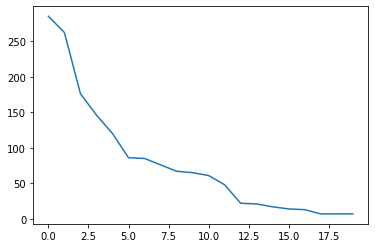

In [ ]:
plt.plot(y)
plt.show()

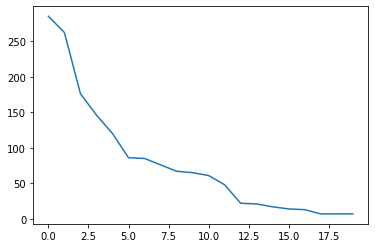

In [ ]:
df['댓글수'].plot()
plt.show()